In [ ]:
import tensorflow as tf### models
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
import sklearn### machine learning library
import cv2## image processing
from sklearn.metrics import confusion_matrix, roc_curve### metrics
import seaborn as sns
import datetime
import pathlib
import io
import os
import time
import random
from google.colab import files
from PIL import Image
import albumentations as A
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
import matplotlib.cm as cm
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import (GlobalAveragePooling2D, Activation, MaxPooling2D, Add, Conv2D, MaxPool2D, Dense,
                                     Flatten, InputLayer, BatchNormalization, Input, Embedding, Permute,
                                     Dropout, RandomFlip, RandomRotation, LayerNormalization, MultiHeadAttention,
                                     RandomContrast, Rescaling, Resizing, Reshape)
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy,TopKCategoricalAccuracy, CategoricalAccuracy, SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (Callback, CSVLogger, EarlyStopping, LearningRateScheduler,
                                        ModelCheckpoint, ReduceLROnPlateau)
from tensorflow.keras.regularizers  import L2, L1
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Example, Features, Feature
from google.colab import drive

In [ ]:
!pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d muhammadhananasghar/human-emotions-datasethes

 98% 302M/309M [00:02<00:00, 159MB/s]
100% 309M/309M [00:02<00:00, 141MB/s]


In [ ]:
!unzip "/content/human-emotions-datasethes.zip" -d "/content/dataset/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/EmotionsDataset/data/nothing/720.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/721.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/722.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/723.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/724.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/725.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/726.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/727.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/728.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/729.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/73.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/730.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/731.jpg  
  inflating: /content/dataset/EmotionsDataset/data/no

In [ ]:
train_directory = '/content/dataset/Emotions Dataset/Emotions Dataset/train'
validation_directory = '/content/dataset/Emotions Dataset/Emotions Dataset/test'

In [ ]:
CLASS_NAMES = ['angry','happy','sad'] #the subfolder names

In [ ]:
CONFIGURATION = {
    "BATCH_SIZE" : 32,
    "IM_SIZE" : 256,
    "LEARNING_RATE": 0.001,
    "N_EPOCHS": 20,
    "DROPOUT_RATE": 0.0,
    "REGULARIZATION_RATE": 0.0,
    "N_FILTERS": 6,
    "KERNEL_SIZE": 3,
    "N_STRIDES": 1,
    "POOL_SIZE": 2,
    "N_DENSE_1": 100,
    "N_DENSE_2": 10,
    "NUM_CLASSES":3
}



In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=99
)

Found 6799 files belonging to 3 classes.


In [ ]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=CONFIGURATION['BATCH_SIZE'],
    image_size=(CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE']),
    shuffle=True,
    seed=99
)

Found 2278 files belonging to 3 classes.


In [ ]:
for i in val_dataset.take(1):
  print(i)

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[ 20.        ,  20.        ,  20.        ],
         [ 19.1875    ,  19.1875    ,  19.1875    ],
         [ 19.        ,  19.        ,  19.        ],
         ...,
         [ 29.125     ,  29.125     ,  29.125     ],
         [ 25.        ,  25.        ,  25.        ],
         [ 25.        ,  25.        ,  25.        ]],

        [[ 20.        ,  20.        ,  20.        ],
         [ 19.847656  ,  19.847656  ,  19.847656  ],
         [ 19.8125    ,  19.8125    ,  19.8125    ],
         ...,
         [ 28.820312  ,  28.820312  ,  28.820312  ],
         [ 25.660156  ,  25.660156  ,  25.660156  ],
         [ 25.        ,  25.        ,  25.        ]],

        [[ 20.6875    ,  20.6875    ,  20.6875    ],
         [ 21.246094  ,  21.246094  ,  21.246094  ],
         [ 21.847656  ,  21.847656  ,  21.847656  ],
         ...,
         [ 25.3125    ,  25.3125    ,  25.3125    ],
         [ 22.375     ,  22.375     ,  22.375 

#Dataset Visualisation

In [ ]:
# plt.figure(figsize = (12,12))

# for images,labels in train_dataset.take(1):
#   for i in range(16):
#     ax = plt.subplot(4,4,i+1)
#     # plt.imshow(images[i].numpy().astype('uint8'))
#     plt.imshow(images[i]/255.)
#     plt.title(CLASS_NAMES[tf.argmax(labels[i],axis = 0).numpy()])
#     plt.axis('off')

#Data Augumentation

In [ ]:
augment_layers = tf.keras.Sequential([

       RandomRotation(factor = (-0.025, 0.025),),
       RandomFlip(mode='horizontal',),
       RandomContrast(factor=0.1),

])

In [ ]:
@tf.function
def augment_layer(image, label):
  return augment_layers(image, training = True), label

#CutMix Augmentation

In [ ]:
def box(lamda):

  r_x = tf.cast(tfp.distributions.Uniform(0, CONFIGURATION['IM_SIZE']).sample(1)[0], dtype = tf.int32)
  r_y = tf.cast(tfp.distributions.Uniform(0, CONFIGURATION['IM_SIZE']).sample(1)[0], dtype = tf.int32)

  r_w = tf.cast(CONFIGURATION['IM_SIZE']*tf.math.sqrt(1-lamda), dtype = tf.int32)
  r_h = tf.cast(CONFIGURATION['IM_SIZE']*tf.math.sqrt(1-lamda), dtype = tf.int32)

  r_x = tf.clip_by_value(r_x - r_w//2, 0, CONFIGURATION['IM_SIZE'])
  r_y = tf.clip_by_value(r_y - r_h//2, 0, CONFIGURATION['IM_SIZE'])

  x_b_r = tf.clip_by_value(r_x + r_w//2, 0, CONFIGURATION['IM_SIZE'])
  y_b_r = tf.clip_by_value(r_y + r_h//2, 0, CONFIGURATION['IM_SIZE'])

  r_w = x_b_r - r_x
  if(r_w == 0):
    r_w  = 1

  r_h = y_b_r - r_y
  if(r_h == 0):
    r_h = 1

  return r_y, r_x, r_h, r_w

In [ ]:
def cutmix(train_dataset_1, train_dataset_2):
  (image_1,label_1), (image_2, label_2) = train_dataset_1, train_dataset_2

  lamda = tfp.distributions.Beta(0.2,0.2)
  lamda = lamda.sample(1)[0]

  r_y, r_x, r_h, r_w = box(lamda)
  crop_2 = tf.image.crop_to_bounding_box(image_2, r_y, r_x, r_h, r_w)
  pad_2 = tf.image.pad_to_bounding_box(crop_2, r_y, r_x, CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE'])

  crop_1 = tf.image.crop_to_bounding_box(image_1, r_y, r_x, r_h, r_w)
  pad_1 = tf.image.pad_to_bounding_box(crop_1, r_y, r_x, CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE'])

  image = image_1 - pad_1 + pad_2

  lamda = tf.cast(1- (r_w*r_h)/(CONFIGURATION['IM_SIZE']*CONFIGURATION['IM_SIZE']), dtype = tf.float32)
  label = lamda*tf.cast(label_1, dtype = tf.float32) + (1-lamda)*tf.cast(label_2, dtype = tf.float32)

  return image, label

In [ ]:
train_dataset_1 = train_dataset.map(augment_layer,num_parallel_calls = tf.data.AUTOTUNE)
train_dataset_2 = train_dataset.map(augment_layer,num_parallel_calls = tf.data.AUTOTUNE)

mixed_dataset = tf.data.Dataset.zip((train_dataset_1,train_dataset_2))

#Dataset Preparation

In [ ]:
# train_dataset = (train_dataset
#                  .map(augment_layer,num_parallel_calls = tf.data.AUTOTUNE)
#                  .prefetch(tf.data.AUTOTUNE)
# )

In [ ]:
train_dataset = (mixed_dataset
                 .map(cutmix,num_parallel_calls = tf.data.AUTOTUNE)
                #  .prefetch(tf.data.AUTOTUNE)
)

In [ ]:
val_dataset = (val_dataset
                #  .prefetch(tf.data.AUTOTUNE)
)

In [ ]:
resize_rescale_layers = tf.keras.Sequential([
    Resizing(CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE']),
    Rescaling(1.0/255)
])

#Modeling

In [ ]:
IM_SIZE = CONFIGURATION['IM_SIZE']
DROPOUT_RATE = CONFIGURATION['DROPOUT_RATE']
REGULARIZATION_RATE = CONFIGURATION['REGULARIZATION_RATE']
N_FILTERS = CONFIGURATION['N_FILTERS']
KERNEL_SIZE = CONFIGURATION['KERNEL_SIZE']
POOL_SIZE = CONFIGURATION['POOL_SIZE']
N_STRIDES = CONFIGURATION['N_STRIDES']

lenet_model = tf.keras.Sequential([

    InputLayer(input_shape = (None, None, 3)),

    resize_rescale_layers,

    Conv2D(filters = CONFIGURATION['N_FILTERS'] , kernel_size = CONFIGURATION['KERNEL_SIZE'], strides = CONFIGURATION['N_STRIDES'] , padding='valid',
          activation = 'relu',kernel_regularizer = L2(CONFIGURATION['REGULARIZATION_RATE'])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION['POOL_SIZE'], strides=CONFIGURATION['N_STRIDES']*2),
    Dropout(rate = CONFIGURATION['DROPOUT_RATE'] ),

    Conv2D(filters = CONFIGURATION['N_FILTERS']*2 + 4 , kernel_size = CONFIGURATION['KERNEL_SIZE'], strides = CONFIGURATION['N_STRIDES'] , padding='valid',
          activation = 'relu',kernel_regularizer = L2(CONFIGURATION['REGULARIZATION_RATE'])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION['POOL_SIZE'], strides=CONFIGURATION['N_STRIDES']*2),

    Flatten(),

    Dense(CONFIGURATION['N_DENSE_1'], activation = "relu", kernel_regularizer = L2(CONFIGURATION['REGULARIZATION_RATE'])),
    BatchNormalization(),
    Dropout(rate = CONFIGURATION['DROPOUT_RATE']),

    Dense(CONFIGURATION['N_DENSE_2'], activation = "relu", kernel_regularizer = L2(CONFIGURATION['REGULARIZATION_RATE'])),
    BatchNormalization(),

    Dense(CONFIGURATION['NUM_CLASSES'], activation = "softmax"),

])

In [ ]:
loss_function = CategoricalCrossentropy(from_logits=False)

In [ ]:
''' Catergorical Cross Entropy is when the data is one hot encoded (0,0,1;1,0,0)
we use tf.argmax to find the label with the highest prob.
Sparse Catergorical Cross Entropy is when the data is normal(2,0)'''

' Catergorical Cross Entropy is when the data is one hot encoded (0,0,1;1,0,0)\nwe use tf.argmax to find the label with the highest prob.\nSparse Catergorical Cross Entropy is when the data is normal(2,0)'

In [ ]:
metrics = [CategoricalAccuracy (name = 'accuracy'), TopKCategoricalAccuracy(k=2 , name = 'top_k_accuracy')]

In [ ]:
lenet_model.compile(
    optimizer = Adam(learning_rate = CONFIGURATION['LEARNING_RATE']),
    loss = loss_function,
    metrics = metrics
)

In [ ]:
history = lenet_model.fit(train_dataset,validation_data = val_dataset,epochs = CONFIGURATION['N_EPOCHS'],verbose = 1)

Epoch 1/20
213/213 [==============================] - 111s 461ms/step - loss: 1.0533 - accuracy: 0.4973 - top_k_accuracy: 0.7932 - val_loss: 1.0238 - val_accuracy: 0.5035 - val_top_k_accuracy: 0.7875
Epoch 2/20
213/213 [==============================] - 105s 485ms/step - loss: 0.9260 - accuracy: 0.5885 - top_k_accuracy: 0.8478 - val_loss: 1.0264 - val_accuracy: 0.5395 - val_top_k_accuracy: 0.7963
Epoch 3/20
213/213 [==============================] - 97s 450ms/step - loss: 0.8871 - accuracy: 0.6141 - top_k_accuracy: 0.8529 - val_loss: 1.1916 - val_accuracy: 0.4030 - val_top_k_accuracy: 0.6901
Epoch 4/20
213/213 [==============================] - 100s 463ms/step - loss: 0.8509 - accuracy: 0.6452 - top_k_accuracy: 0.8738 - val_loss: 0.7984 - val_accuracy: 0.6519 - val_top_k_accuracy: 0.8723
Epoch 5/20
213/213 [==============================] - 98s 453ms/step - loss: 0.8120 - accuracy: 0.6672 - top_k_accuracy: 0.8870 - val_loss: 0.7274 - val_accuracy: 0.6888 - val_top_k_accuracy: 0.9021
Ep

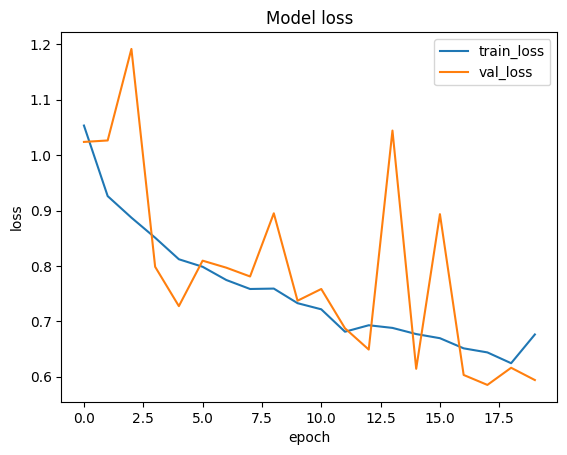

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

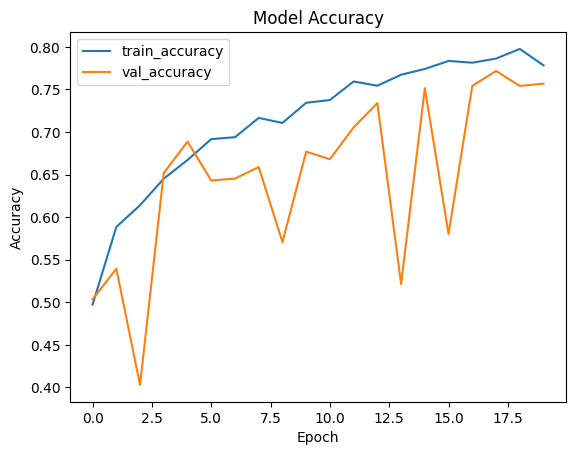

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

#Evaluate

In [ ]:
lenet_model.evaluate(val_dataset)

72/72 [==============================] - 4s 47ms/step - loss: 0.5941 - accuracy: 0.7568 - top_k_accuracy: 0.9263


[0.594066858291626, 0.7568042278289795, 0.9262511134147644]

#Testing

In [ ]:
test_image = cv2.imread("/content/dataset/Emotions Dataset/Emotions Dataset/test/angry/112345.jpg")

im = tf.constant(test_image , dtype = tf.float32)

im = tf.expand_dims(im,axis = 0) #we have to add extra dimension because we have batched our data


print(CLASS_NAMES[tf.argmax(lenet_model(im),axis = 1).numpy()[0]])


angry


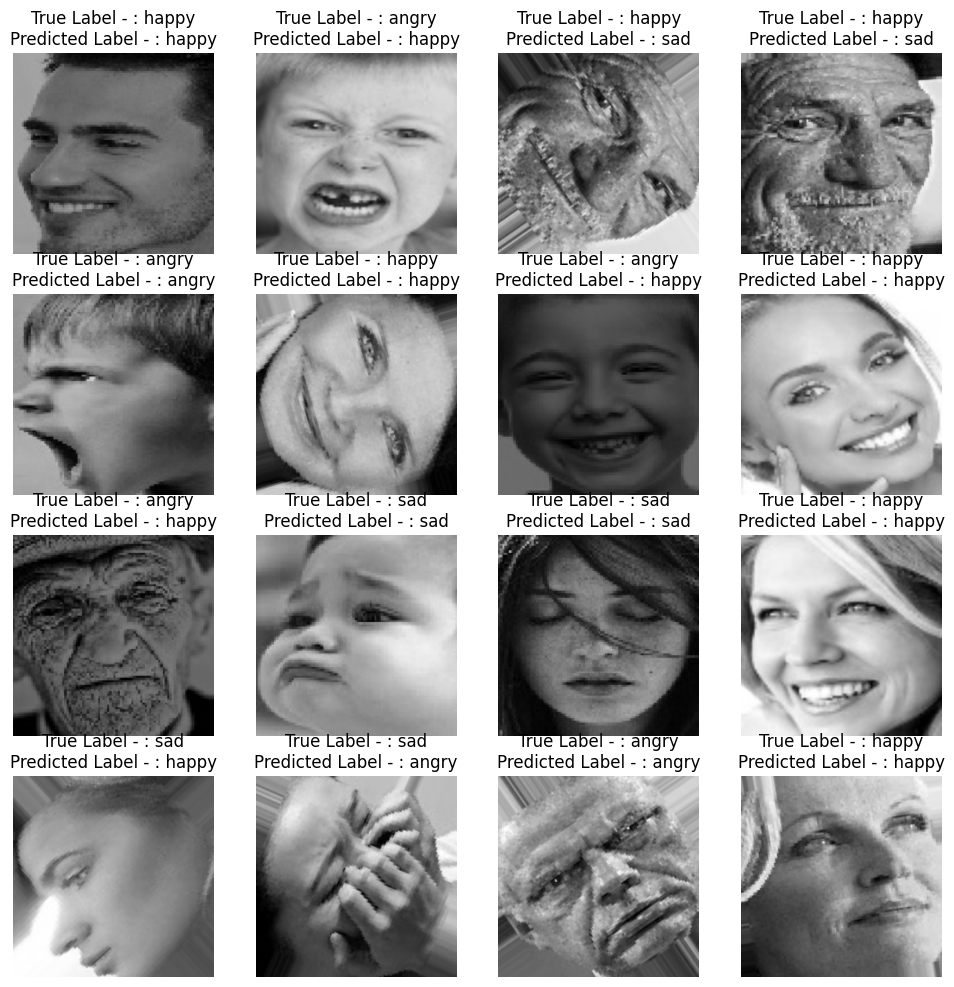

In [ ]:
plt.figure(figsize = (12,12))

for images, labels in val_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4,4, i+1)
    plt.imshow(images[i]/255.)

    plt.title("True Label - : " + CLASS_NAMES[tf.argmax(labels[i],axis = 0).numpy()]
              + "\n" + "Predicted Label - : "
              + CLASS_NAMES[int(tf.argmax(lenet_model(tf.expand_dims(images[i],axis = 0)), axis =-1).numpy()[0])])
    plt.axis("off")

In [ ]:
predicted = []
labels = []

for im,label in val_dataset:
  predicted.append(lenet_model(im))
  labels.append(label.numpy())

In [ ]:
print(np.concatenate([np.argmax(labels[:-1], axis = -1).flatten(), np.argmax(labels[-1], axis = -1).flatten()]))
print(np.concatenate([np.argmax(predicted[:-1], axis = -1).flatten(), np.argmax(predicted[-1], axis = -1).flatten()]))

[1 1 0 ... 0 2 2]
[1 1 0 ... 0 2 2]


In [ ]:
pred = np.concatenate([np.argmax(predicted[:-1], axis = -1).flatten(), np.argmax(predicted[-1], axis = -1).flatten()])
lab = np.concatenate([np.argmax(labels[:-1], axis = -1).flatten(), np.argmax(labels[-1], axis = -1).flatten()])

[[341  67 107]
 [ 57 825 124]
 [ 79 120 558]]


Text(0.5, 58.7222222222222, 'Predicted')

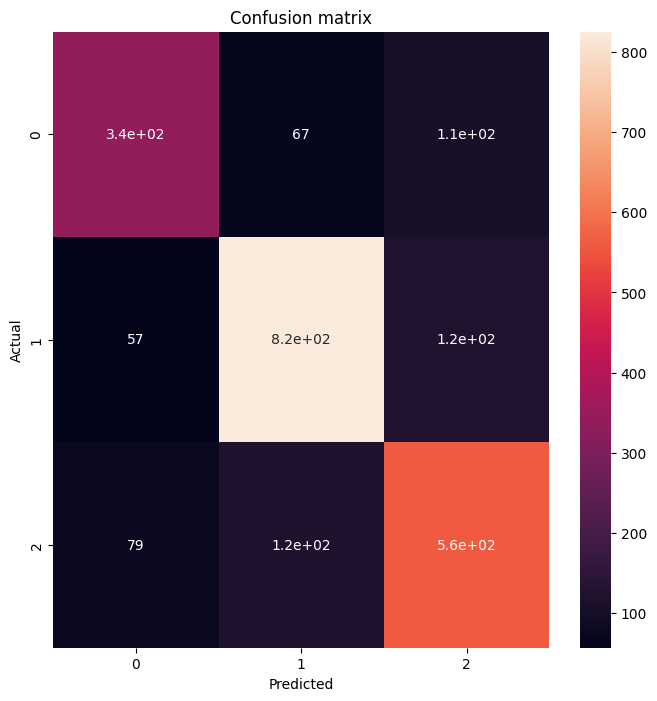

In [ ]:

cm = confusion_matrix(lab, pred)
print(cm)
plt.figure(figsize=(8,8))

sns.heatmap(cm, annot=True,)
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')


#TFR Records

In [ ]:
# train_dataset = (
#     train_dataset
#     .unbatch()
# )

In [ ]:
# val_dataset = (
#     val_dataset
#     .unbatch()
# )

In [ ]:
# def create_example(image, label):

#   bytes_feature = Feature(
#       bytes_list=BytesList(value=[image]))

#   int_feature = Feature(
#       int64_list=Int64List(value=[label]))

#   example = Example(
#       features=Features(feature={
#           'images': bytes_feature,
#           'labels': int_feature,
#       }))

#   return example.SerializeToString()

In [ ]:
# NUM_SHARDS = 10
# PATH = 'tfrecords/shard_{:02d}.tfrecord'

In [ ]:
# def encode_image(image, label):
#   image = tf.image.convert_image_dtype(image, dtype=tf.uint8)
#   image = tf.io.encode_jpeg(image)
#   return image,tf.argmax(label)

In [ ]:
# encoded_dataset = (
#   train_dataset
#   .map(encode_image)
# )

In [ ]:
# for shard_number in range(NUM_SHARDS):

#   sharded_dataset = (
#       encoded_dataset
#       .shard(NUM_SHARDS, shard_number)
#       .as_numpy_iterator()
#   )

#   with tf.io.TFRecordWriter(PATH.format(shard_number)) as file_writer:
#     for encoded_image, encoded_label in sharded_dataset:

#       example = create_example(encoded_image, encoded_label)
#       file_writer.write(example)

In [ ]:
# recons_dataset = tf.data.TFRecordDataset(
#     filenames =[PATH.format(p) for p in range(NUM_SHARDS-2)] )
# # val_recons_dataset = tf.data.TFRecordDataset(
# #     filenames =[PATH.format(p) for p in range(NUM_SHARDS-2,NUM_SHARDS)] )


In [ ]:
# def parse_tfrecords(example):

#     feature_description = {
#           "images": tf.io.FixedLenFeature([], tf.string),
#           "labels": tf.io.FixedLenFeature([], tf.int64),
#       }

#     example = tf.io.parse_single_example(example, feature_description)
#     example["images"] = tf.image.convert_image_dtype(
#         tf.io.decode_jpeg(
#         example["images"], channels = 3), dtype = tf.float32)

#     return example["images"], example["labels"]


In [ ]:
# parsed_dataset = (
#     recons_dataset
#     .map(parse_tfrecords)
#     .batch(CONFIGURATION["BATCH_SIZE"])
#     .prefetch(tf.data.AUTOTUNE)
# )


In [ ]:
# drive.mount('/content/drive/')

In [ ]:
# !cp -r /content/tfrecords /content/drive/MyDrive/

In [ ]:
## val_parsed_dataset = (
##     val_recons_dataset
##     .map(parse_tfrecords)
##     .batch(CONFIGURATION["BATCH_SIZE"])
##     .prefetch(tf.data.AUTOTUNE)
## )


In [ ]:
# parsed_dataset

In [ ]:
# lenet_model = tf.keras.Sequential(
#     [
#     InputLayer(input_shape = (None, None, 3), ),

#     resize_rescale_layers,

#     Conv2D(filters = CONFIGURATION["N_FILTERS"] , kernel_size = CONFIGURATION["KERNEL_SIZE"], strides = CONFIGURATION["N_STRIDES"] , padding='valid',
#           activation = 'relu',kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
#     BatchNormalization(),
#     MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),
#     Dropout(rate = CONFIGURATION["DROPOUT_RATE"] ),

#     Conv2D(filters = CONFIGURATION["N_FILTERS"]*2 + 4, kernel_size = CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',
#           activation = 'relu', kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
#     BatchNormalization(),
#     MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),

#     Flatten(),

#     Dense( CONFIGURATION["N_DENSE_1"], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
#     BatchNormalization(),
#     Dropout(rate = CONFIGURATION["DROPOUT_RATE"]),

#     Dense( CONFIGURATION['N_DENSE_2'], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
#     BatchNormalization(),

#     Dense(CONFIGURATION["NUM_CLASSES"], activation = "softmax"),

# ])

# lenet_model.summary()

In [ ]:
# loss_function = SparseCategoricalCrossentropy() #sparse coz we used
# argmax before and now it is 0,0,1 -> 2

# metrics = [SparseCategoricalAccuracy(name = "accuracy")]

# lenet_model.compile(
#     optimizer = Adam(learning_rate = CONFIGURATION["LEARNING_RATE"]),
#     loss = loss_function,
#     metrics = metrics)


In [ ]:
# history = lenet_model.fit(
#     parsed_dataset,
#     #validation_data = validation_dataset,
#     epochs = CONFIGURATION["N_EPOCHS"],
#     verbose = 1,
#     #class_weight = class_weights,
#     #callbacks = [WandbCallback(), LogConfMatrix(), LogResultsTable()]
#     )

#Feature Extraction using Transfer Learning

In [ ]:
backbone = tf.keras.applications.efficientnet.EfficientNetB4(
    include_top=False,
    weights='imagenet',
    input_shape=(CONFIGURATION['IM_SIZE'],CONFIGURATION['IM_SIZE'],3)
)

71686520/71686520 [==============================] - 0s 0us/step


In [ ]:
backbone.trainable = False

In [ ]:
pretrained_model = tf.keras.Sequential([
    Input(shape = (CONFIGURATION['IM_SIZE'],CONFIGURATION['IM_SIZE'],3)),
    backbone,
    GlobalAveragePooling2D(),
    Dense(1024,activation = 'relu'),
    BatchNormalization(),
    Dense(128,activation = 'relu'),
    Dense(CONFIGURATION['NUM_CLASSES'],activation = 'softmax')
])

In [ ]:
pretrained_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb4 (Functional  (None, 8, 8, 1792)        17673823  
 )                                                               
                                                                 
 global_average_pooling2d_1  (None, 1792)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_3 (Dense)             (None, 1024)              1836032   
                                                                 
 batch_normalization_4 (Bat  (None, 1024)              4096      
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 128)               131200    
                                                      

In [ ]:
loss_function = CategoricalCrossentropy(from_logits=False)

In [ ]:
metrics = [CategoricalAccuracy (name = 'accuracy'), TopKCategoricalAccuracy(k=2 , name = 'top_k_accuracy')]

In [ ]:
pretrained_model.compile(
    optimizer = Adam(learning_rate = CONFIGURATION['LEARNING_RATE']),
    loss = loss_function,
    metrics = metrics
)

In [ ]:
history = pretrained_model.fit(train_dataset,validation_data = val_dataset,epochs = CONFIGURATION['N_EPOCHS'],verbose = 1)

Epoch 1/20
213/213 [==============================] - 142s 548ms/step - loss: 1.0386 - accuracy: 0.6176 - top_k_accuracy: 0.8617 - val_loss: 0.7547 - val_accuracy: 0.6756 - val_top_k_accuracy: 0.8731
Epoch 2/20
213/213 [==============================] - 111s 514ms/step - loss: 0.8092 - accuracy: 0.6904 - top_k_accuracy: 0.8917 - val_loss: 0.6343 - val_accuracy: 0.7327 - val_top_k_accuracy: 0.9056
Epoch 3/20
213/213 [==============================] - 111s 513ms/step - loss: 0.7747 - accuracy: 0.7100 - top_k_accuracy: 0.9040 - val_loss: 0.6289 - val_accuracy: 0.7322 - val_top_k_accuracy: 0.9192
Epoch 4/20
213/213 [==============================] - 112s 518ms/step - loss: 0.7566 - accuracy: 0.7132 - top_k_accuracy: 0.9054 - val_loss: 0.6237 - val_accuracy: 0.7287 - val_top_k_accuracy: 0.9061
Epoch 5/20
 29/213 [===>..........................] - ETA: 1:23 - loss: 0.6871 - accuracy: 0.7446 - top_k_accuracy: 0.9235

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [ ]:
pretrained_model.evaluate(val_dataset)

In [ ]:
test_image = cv2.imread("/content/dataset/Emotions Dataset/Emotions Dataset/test/angry/112345.jpg")
test_image = cv2.resize(test_image,(CONFIGURATION['IM_SIZE'],CONFIGURATION['IM_SIZE']))
im = tf.constant(test_image , dtype = tf.float32)

im = tf.expand_dims(im,axis = 0) #we have to add extra dimension because we have batched our data

print(CLASS_NAMES[tf.argmax(pretrained_model(im),axis = 1).numpy()[0]])


In [ ]:
plt.figure(figsize = (12,12))

for images, labels in val_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4,4, i+1)
    plt.imshow(images[i]/255.)

    plt.title("True Label - : " + CLASS_NAMES[tf.argmax(labels[i],axis = 0).numpy()]
              + "\n" + "Predicted Label - : "
              + CLASS_NAMES[int(tf.argmax(pretrained_model(tf.expand_dims(images[i],axis = 0)), axis =-1).numpy()[0])])
    plt.axis("off")

In [ ]:
predicted = []
labels = []

for im,label in val_dataset:
  predicted.append(pretrained_model(im))
  labels.append(label.numpy())

In [ ]:
pred = np.concatenate([np.argmax(predicted[:-1], axis = -1).flatten(), np.argmax(predicted[-1], axis = -1).flatten()])
lab = np.concatenate([np.argmax(labels[:-1], axis = -1).flatten(), np.argmax(labels[-1], axis = -1).flatten()])

In [ ]:
cm = confusion_matrix(lab, pred)
print(cm)
plt.figure(figsize=(8,8))

sns.heatmap(cm, annot=True)
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

#FineTuning with Efficient Net (we use functional api)

In [ ]:
backbone = tf.keras.applications.efficientnet.EfficientNetB4(
    include_top=False,
    weights='imagenet',
    input_shape=(CONFIGURATION['IM_SIZE'],CONFIGURATION['IM_SIZE'],3)
)

backbone.trainable = False

#for fune tuning , first backbone.trainable will be false and then true. After setting to true, we just need to recompile the model with a much smaller learning rate and then fit.

In [ ]:
input = Input(shape = (CONFIGURATION['IM_SIZE'],CONFIGURATION['IM_SIZE'],3))

x = backbone(input,training = False)

x = GlobalAveragePooling2D()(x)

x = Dense(1024,activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dense(128,activation = 'relu')(x)

output = Dense(CONFIGURATION['NUM_CLASSES'],activation = 'softmax')(x)

finetuned_model = Model(input, output)

In [ ]:
finetuned_model.summary()

In [ ]:
loss_function = CategoricalCrossentropy(from_logits=False)

In [ ]:
metrics = [CategoricalAccuracy (name = 'accuracy'), TopKCategoricalAccuracy(k=2 , name = 'top_k_accuracy')]

In [ ]:
finetuned_model.compile(
    optimizer = Adam(learning_rate = CONFIGURATION['LEARNING_RATE']),
    loss = loss_function,
    metrics = metrics
)

In [ ]:
history = finetuned_model.fit(train_dataset,validation_data = val_dataset,epochs = 7,verbose = 1)

In [ ]:
finetuned_model.evaluate(val_dataset)

In [ ]:
backbone.trainable = True
finetuned_model.compile(
    optimizer = Adam(learning_rate = CONFIGURATION['LEARNING_RATE']/100),
    loss = loss_function,
    metrics = metrics
)

In [ ]:
history = finetuned_model.fit(train_dataset,validation_data = val_dataset,epochs = 7,verbose = 1)

In [ ]:
finetuned_model.evaluate(val_dataset)

In [ ]:
# After performing Fine Tuning, we see the Val_accuracy increases.